# HopHacks

Created 2021/09/17  
Authors: A.S., P.B., Y.P.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial  import distance as dist 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity as cos_sim
from getKeyWords import getKeyWords as gkw
from sklearn.neighbors import KDTree
from sklearn.gaussian_process.kernels import Matern, RBF,  ConstantKernel
import csv

# import nltk as nltk
# nltk.download('punkt')

### Toy Examples

In [2]:
c1 = ["This course is an introduction to stochastic differential equations and applications."
      " Basic topics to be reviewed include Ito and Stratonovich integrals, Ito formula,"
      " SDEs and their integration. The course will focus on diffusion processes and diffusion theory,"
      " with topics include Markov properties, generator, Kolmogrov’s equations (Fokker-Planck equation),"
      " Feynman-Kac formula, the martingale problem, Girsanov theorem, stability and ergodicity."
      " The course will briefly introduce applications, with topics include statistical "
      "inference of SDEs, filtering and control."]


c2= ["The objective of the course is to survey essential simulation techniques for popular"
     " stochastic models. The stochastic models may include classical time-series models, "
     "Markov chains and diffusion models. The basic simulation techniques covered will be"
     " useful in sample-generation of random variables, vectors and stochastic processes,"
     " and as advanced techniques, importance sampling, particle filtering and Bayesian"
     " computation may be discussed."]


c3=  ["The course covers fundamental mathematical ideas for certain approximation"
      "and statistical learning problems in high dimensions. We start with basic approximation"
      "theory in low-dimensions, in particular linear and nonlinear approximation by Fourier "
      "and wavelets in classical smoothness spaces, and discuss applications in imaging,"
      " inverse problems and PDE’s. We then introduce notions of complexity of function spaces,"
      " which will be important in statistical learning. We then move to basic problems in"
      " statistical learning, such as regression and density estimation. The interplay between"
      " randomness and approximation theory is introduced, as well as fundamental tools such as"
      " concentration inequalities, basic random matrix theory, and various estimators are"
      "constructed in detail, in particular multi scale estimators. At all times we consider"
      " the geometric aspects and interpretations, and will discuss concentration of"
      " measure phenomena, embedding of metric spaces, optimal transportation distances,"
      " and their applications to problems in machine learning such as manifold learning "
      "and dictionary learning for signal processing."]
      
c4= ["Data mining is a relatively new term used in the academic and business world, "
     "often associated with the development and quantitative analysis of very large"
     " databases. Its definition covers a wide spectrum of analytic and information "
     "technology topics, such as machine learning, artificial intelligence,"
     " statistical modeling, and efficient database development."
     " This course will review these broad topics, and cover specific analytic"
     " and modeling techniques such as advanced data visualization, decision trees,"
     "neural networks, nearest neighbor, clustering, logistic regression,"
     " and association rules. Although some of the mathematics underlying"
     " these techniques will be discussed, our focus will be on the application "
     "of the techniques to real data and the interpretation of results."
     " Because use of the computer is extremely important when “mining” large amounts of data,"
     "we will make substantial use of data mining software tools to learn "
     "the techniques and analyze datasets."]
     
c5=["By employing fundamental concepts from diverse areas of research,"
    " such as statistics, signal processing, biophysics, biochemistry,"
    " cell biology, and epidemiology, this course introduces a multidisciplinary"
    " and rigorous approach to the modeling and computational analysis of complex "
    "interaction networks. Topics to be covered include: overview of complex nonlinear"
    "interaction networks and their applications, graph-theoretic representations "
    "of network topology and stoichiometry, stochastic modeling of dynamic processes on"
    " complex networks and master equations, Langevin, Poisson, Fokker-Plank,"
    "and moment closure approximations, exact and approximate Monte Carlo simulation techniques,"
    "time-scale separation approaches, deterministic and stochastic sensitivity analysis techniques,"
    " network thermodynamics, and reverse engineering approaches for inferring network models from data."]


# c6= ["The objective of the course is to survey essential simulation techniques for popular"
#      " stochastic models. The stochastic models may include classical time-series models, "
#      "Markov chains and diffusion models. The basic simulation techniques covered will be"
#      " useful in sample-generation of random variables, vectors and stochastic processes,"
#      " and as advanced techniques, importance sampling, particle filtering and Bayesian"
#      " computation may be discussed."]

c6= ["The objective of the course is to survey essential simulation techniques for popular"
     " stochastic models.  "
    " complex networks and master equations, Langevin, Poisson, Fokker-Plank,"
    "and moment closure approximations, exact and approximate Monte Carlo simulation techniques,"
    "time-scale separation approaches, deterministic and stochastic sensitivity analysis techniques,"
    " network thermodynamics, and reverse engineering approaches for inferring network models from data."]




In [3]:
descriptions = pd.read_excel('courseInfo.xlsx')

desc1 =list(descriptions['description'].values)
course_name1 =list(descriptions['courseName'].values)
course_cod1 =list(descriptions['courseNum'].values)

N_samples = len(desc1)


In [4]:
stopwords = np.load('stopwords.npy')

def filtering(c):
    return list(gkw(c[0], stopwords, 20))

In [5]:
# c_list=[c1,c2,c3,c4, c5, c6]

# N_samples = len(c_list)

# #Need a way to do this automatically    
# c_all = filtering(c1)+filtering(c2)+filtering(c3)+filtering(c4)+filtering(c5)+filtering(c6)

filtering([desc1[1]])

['nonmetal',
 'metal',
 'manufacturing',
 'various',
 'used',
 'grand',
 'engineering',
 'considered',
 'components',
 'aspects',
 'SolidWorks',
 'Simple',
 'machining',
 'like',
 'including',
 'drawing',
 'removal',
 'computer-controlled',
 'software',
 'joining']

In [6]:
N_desc = len(desc1)

desc_all =  ['']
# desc_all =  ''

for i in range(0,N_desc):
    
    if i not in [89, 185, 192, 242]:

        desc_all += filtering([desc1[i]])
#         desc_all += desc1[i]
        
        
desc_all = desc_all

### Creating Vocabulary and Indexing

In [7]:
vectorizer = CountVectorizer()

In [8]:
# vectorizer.fit(c_all)
vectorizer.fit(desc_all)

vocc =vectorizer.vocabulary_

N_voc = len(vocc)

N_voc

1884

### Vectorizing the texts

In [9]:
vectorizer.transform(c1).toarray().ravel().shape

(1884,)

In [10]:
Vectors = np.zeros([N_samples, N_voc])


for i in range(N_samples):
    if i not in [89, 185, 192, 242]:

#     Vectors[i,:] = vectorizer.transform(c_list[i]).toarray().ravel()
            Vectors[i,:] = vectorizer.transform([desc1[i]]).toarray().ravel()

### Similarity

<IPython.core.display.Javascript object>


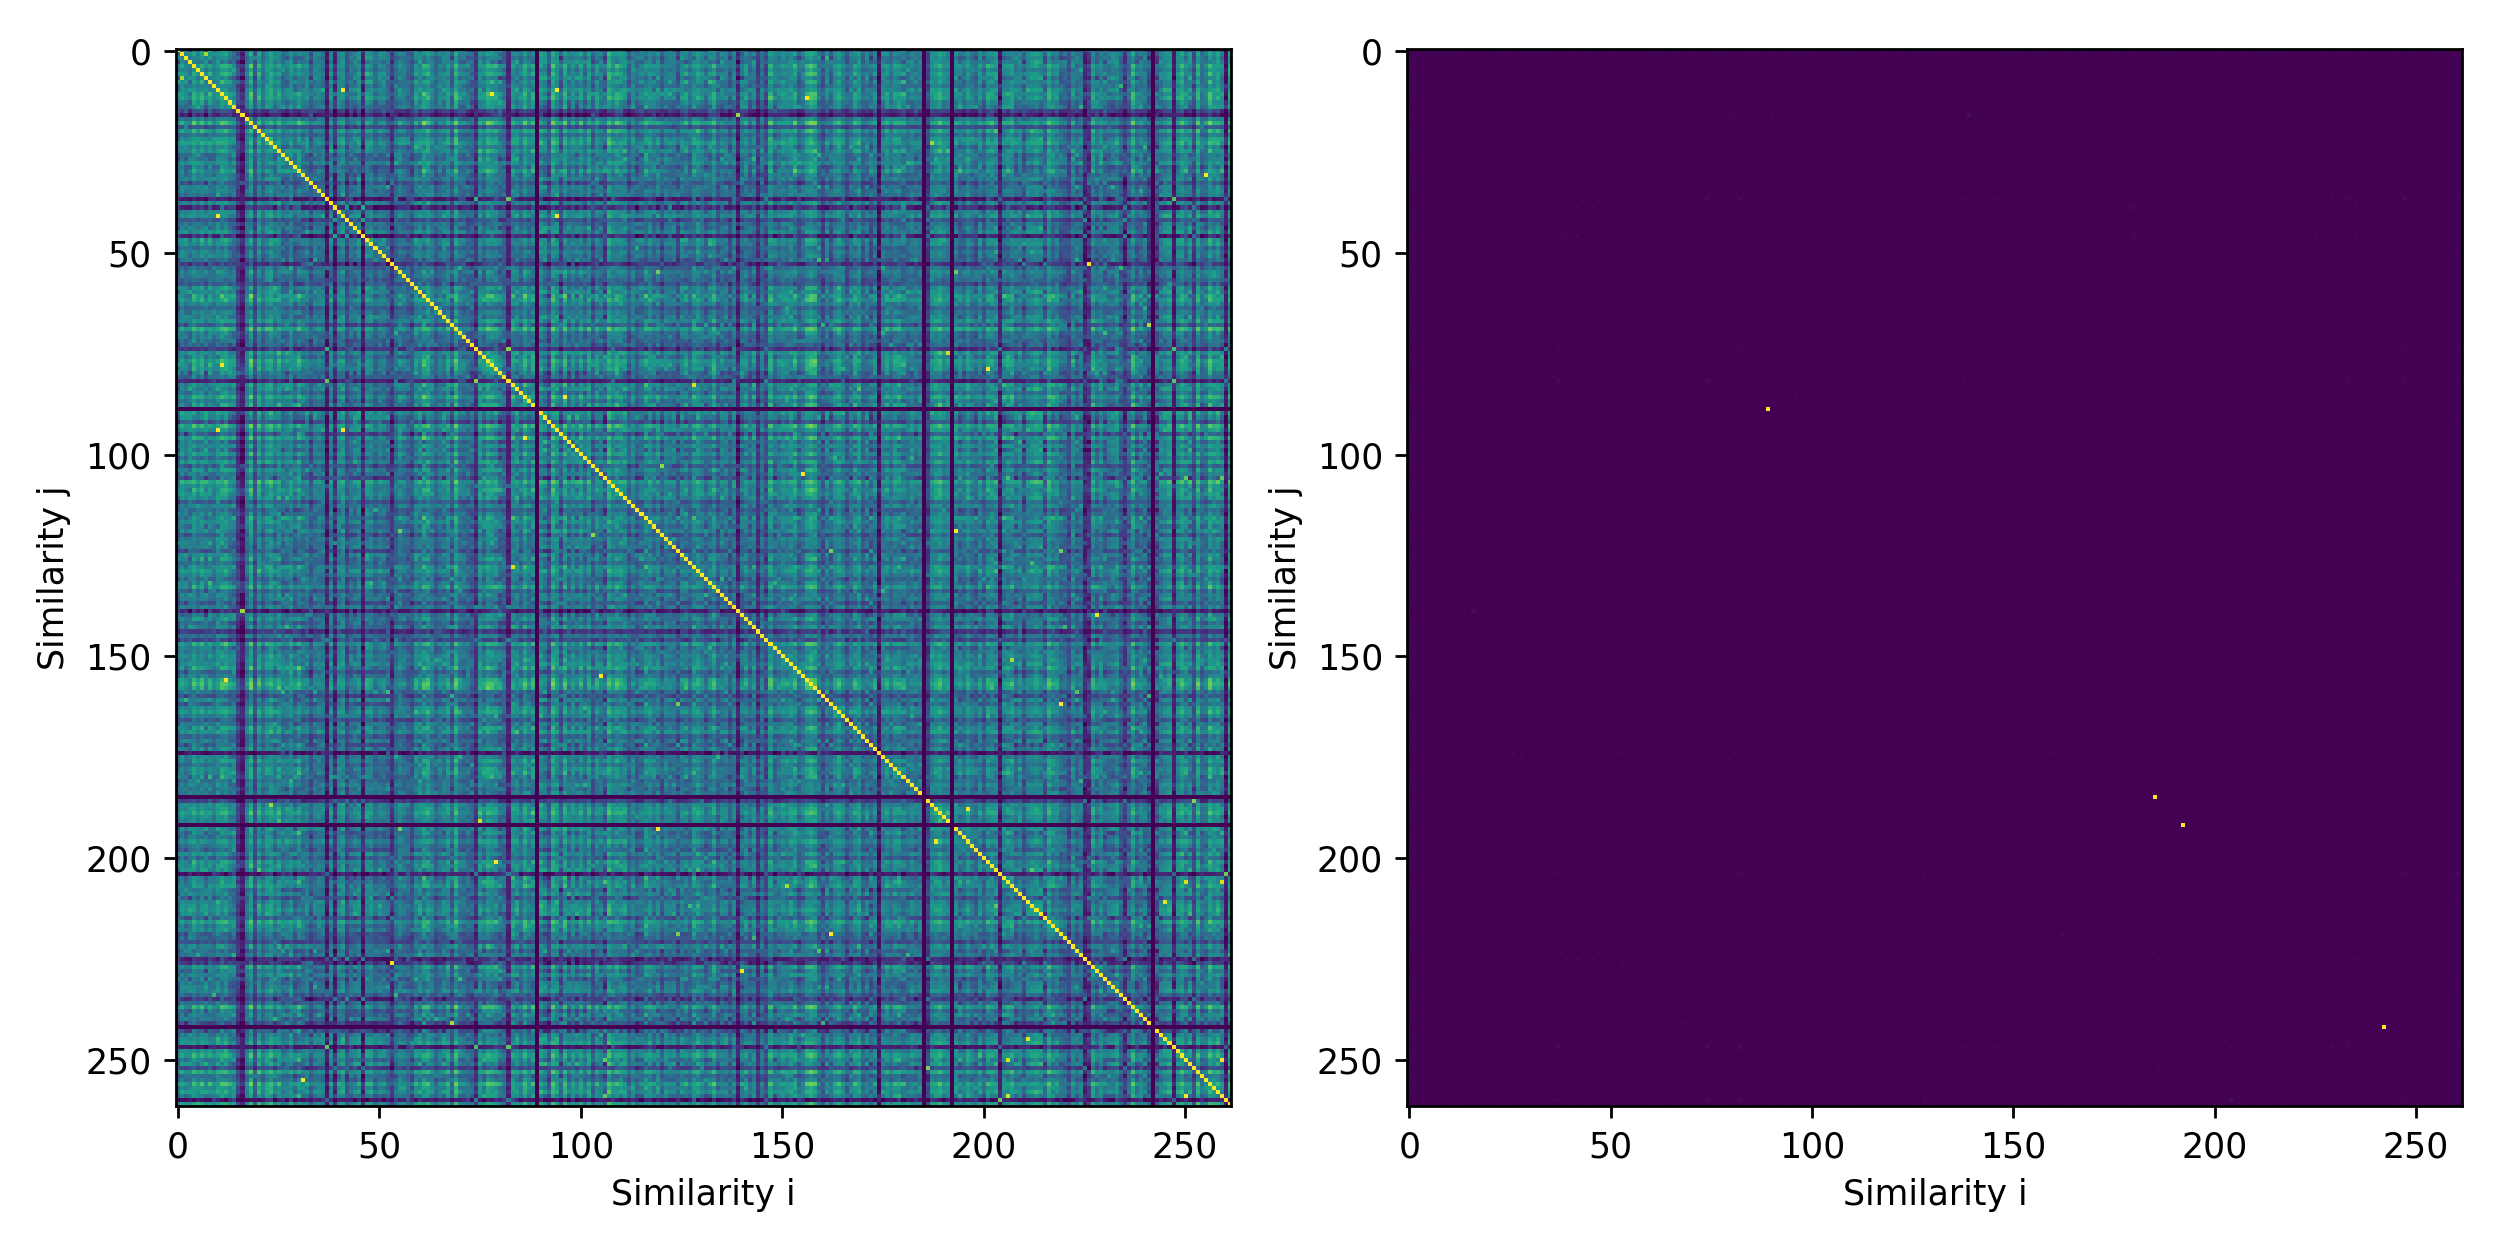

Text(0, 0.5, 'Similarity j')

In [11]:
# K1 = Vectors @ Vectors.T

# K1 = dist.squareform( dist.pdist(Vectors, metric='euclidean'))

K1= cos_sim(Vectors)

K1_nod = K1 -np.eye(N_samples)

D=np.sum(K1_nod, axis=1)

D_inv = np.diag(1.0 / (D))

K1_norm = D_inv @ K1_nod

fig, ax = plt.subplots(figsize=[10,5], tight_layout=True, nrows=1, ncols=2)
ax[0].imshow(K1, aspect='auto')

ax[0].set_xlabel('Similarity i')
ax[0].set_ylabel('Similarity j')

ax[1].imshow(K1_norm, aspect='auto')

ax[1].set_xlabel('Similarity i')
ax[1].set_ylabel('Similarity j')

### Matching

Computer Integrated Surgery II
This weekly lecture/seminar course addresses similar material to EN.601.445, but covers selected topics in greater depth. In addition to material covered in lectures/seminars by the instructor and other faculty, students are expected to read and provide critical analysis/presentations of selected papers in recitation sessions. Students taking this course are required to undertake and report on a significant term project under the supervision of the instructor and clinical end users. Typically, this project is an extension of the term project from EN.601.445, although it does not have to be. Grades are based both on the project and on classroom recitations. Students wishing to attend the weekly lectures as a 1-credit seminar should sign up for EN.600.452. [Applications]

Computer Integrated Surgery II - Teams
This weekly lecture/seminar course addresses similar material to 600.455, but covers selected topics in greater depth. In addition to material covere

<IPython.core.display.Javascript object>


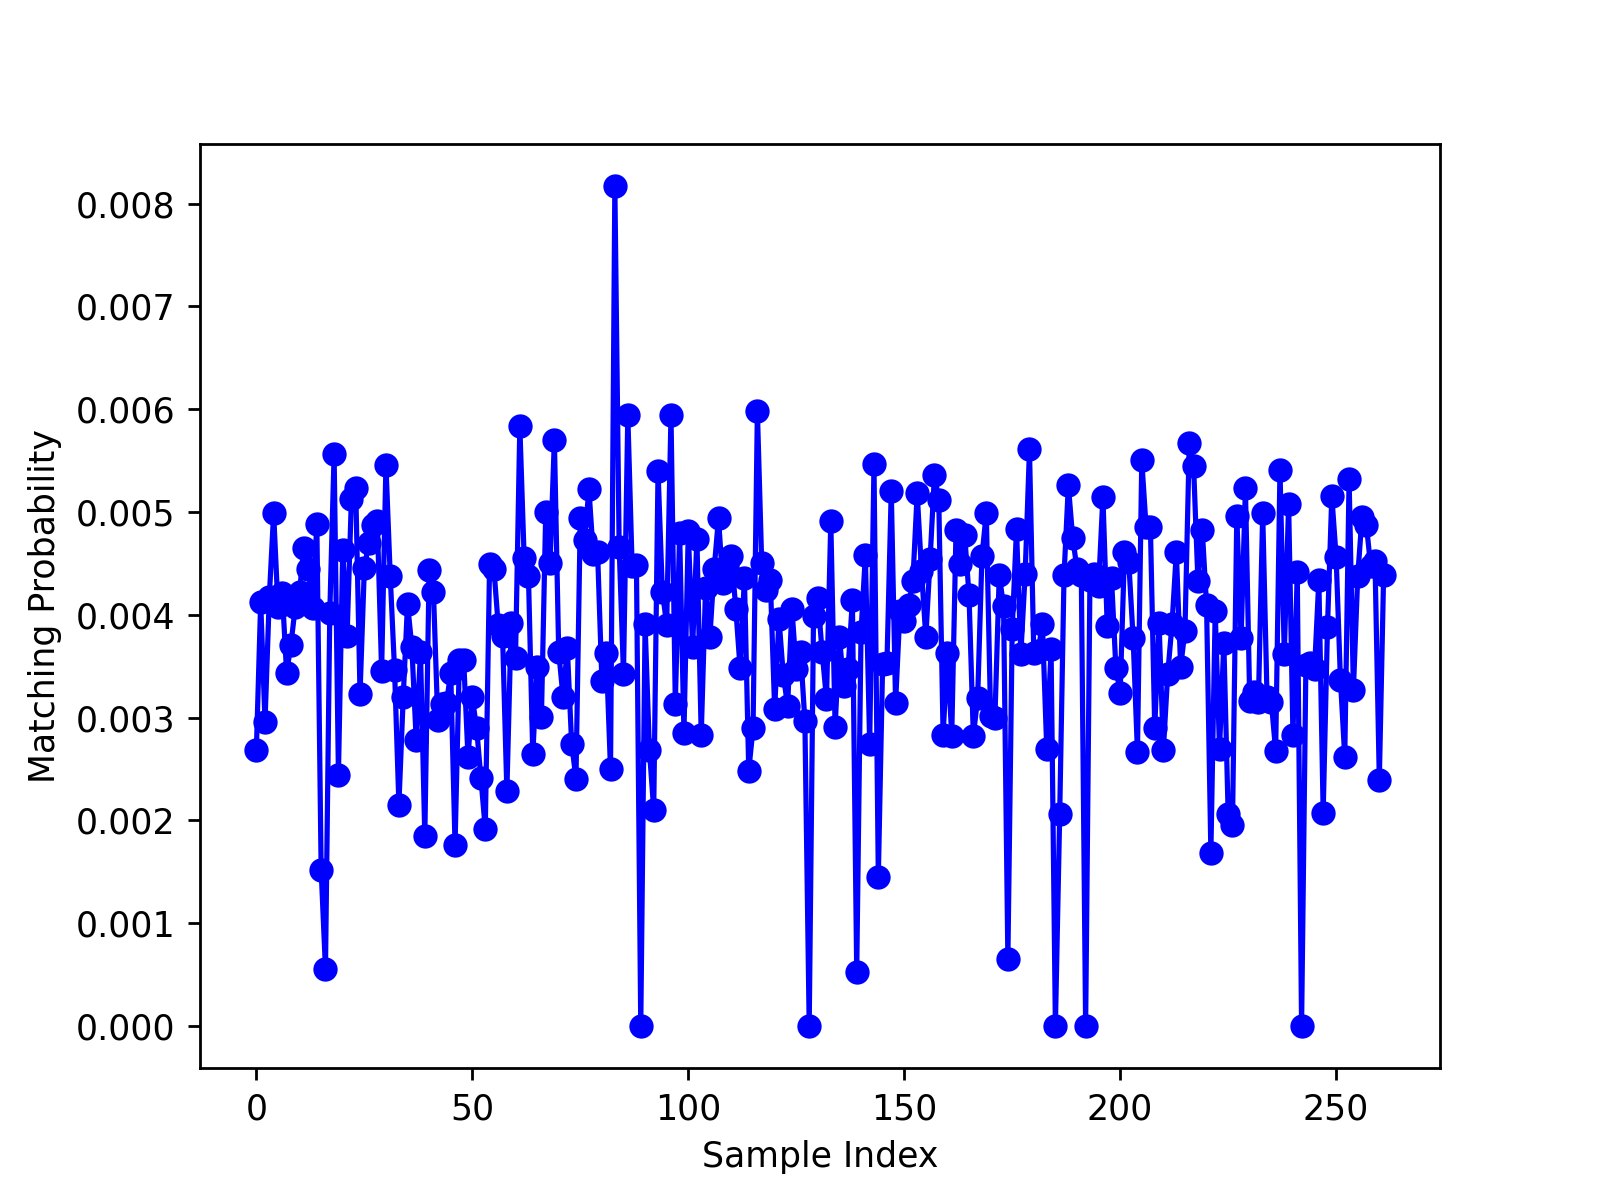

83

In [25]:
N_query = np.random.randint(N_samples)

print(course_name1[N_query])
print(desc1[N_query])
print('')
print(course_name1[np.argmax(K1_norm[N_query,:])])
print(desc1[np.argmax(K1_norm[N_query,:])])

fig, ax = plt.subplots()
ax.plot(K1_norm[N_query,:], '-o', c='blue')
ax.set_ylabel('Matching Probability')
ax.set_xlabel('Sample Index');



np.argmax(K1_norm[N_query,:])

In [13]:
desc1[11], course_name1[11], N_query

('Prereq: ME Majors: 530.215, 530.327   EM & BME Majors: 530.215 or 530.405, and 530.327   _x000D_\nThis senior year â€œcapstone designâ€\x9d course is intended to give some practice and experience in the art of engineering design. Students working in teams of two to four will select a small-scale, industry-suggested design problem in the area of small production equipment, light machinery products, or manufacturing systems and methods. A solution to the problem is devised and constructed by the student group within limited time and cost boundaries. Preliminary oral reports of the proposed solution are presented at the end of the first semester or sooner. A final device, product, system, or method is presented orally and in writing at the end of the second semester. Facilities of the Engineering Design Laboratory (including machine shop time) and a specified amount of money are allocated to each student design team for purchases of parts, supplies, and machine shop time where needed.',

In [14]:
desc1[78], course_name1[78]

('Prereq: Mech.Eng. majors: 530.215 & 530.327; Eng. Mech. majors & BME majors: 530.215 or 530.405 plus 530.327_x000D_\nThis senior year â€œcapstone designâ€\x9d course is intended to give some practice and experience in the art of engineering design. Students working in teams of two to four will select a small-scale, industry-suggested design problem in the area of small production equipment, light machinery products, or manufacturing systems and methods. A solution to the problem is devised and constructed by the student group within limited time and cost boundaries. Preliminary oral reports of the proposed solution are presented at the end of the first semester or sooner. A final device, product, system, or method is presented orally and in writing at the end of the second semester. Facilities of the Engineering Design Laboratory (including machine shop time) and a specified amount of money are allocated to each student design team for purchases of parts, supplies, and machine shop t

In [15]:
desc1[94], course_name1[94]

('This course introduces fundamental programming concepts and techniques, and is intended for all who plan to develop computational artifacts or intelligently deploy computational tools in their studies and careers. Topics covered include the design and implementation of algorithms using variables, control structures, arrays, functions, files, testing, debugging, and structured program design. Elements of object-oriented programming. algorithmic efficiency and data visualization are also introduced. Students deploy programming to develop working solutions that address problems in engineering, science and other areas of contemporary interest that vary from section to section. Course homework involves significant programming. Attendance and participation in class sessions are expected.',
 'Gateway Computing: Matlab')

### Learning

In [16]:
# u1=

### Encoding to Decoding and backwards

In [17]:
# vector2 =  vectorizer.transform(text1)
# v2= vector2.toarray().ravel()

# print(text1)

# for j in range(v2.shape[0]):


#     if v2[j]!=0:
#         for i in range(v2[j]):
#             print(list(vocc.keys())[list(vocc.values()).index(j)])